In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-07-06 11:11:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2023-07-06 11:11:48 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/') #turning our path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #create a list of class_names
print(class_names)

['pizza' 'steak']


data_dir.glob('*'): This uses the glob function from the pathlib module to iterate over all items in the data_dir directory. The '*' argument specifies that we want to select all files and directories within data_dir.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') #show shape of image

  return img

Image shape: (512, 512, 3)


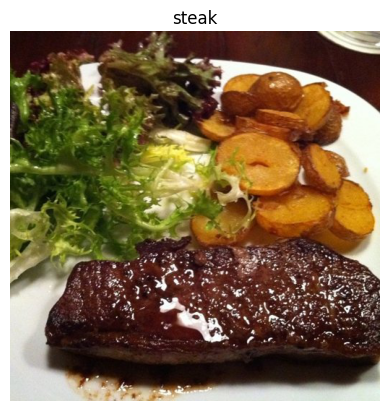

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

In [10]:
img

array([[[ 29,   9,  10],
        [ 29,   9,  10],
        [ 30,  10,  11],
        ...,
        [158, 146, 130],
        [157, 146, 128],
        [156, 145, 127]],

       [[ 33,  13,  12],
        [ 33,  13,  12],
        [ 33,  13,  12],
        ...,
        [158, 146, 130],
        [159, 147, 131],
        [159, 148, 130]],

       [[ 34,  14,  13],
        [ 34,  14,  13],
        [ 34,  14,  13],
        ...,
        [144, 132, 118],
        [154, 142, 126],
        [160, 148, 132]],

       ...,

       [[218, 219, 211],
        [217, 218, 210],
        [215, 216, 208],
        ...,
        [224, 236, 224],
        [227, 239, 227],
        [229, 241, 229]],

       [[216, 217, 209],
        [215, 216, 208],
        [213, 214, 206],
        ...,
        [225, 237, 225],
        [226, 236, 225],
        [227, 237, 226]],

       [[215, 216, 208],
        [216, 217, 209],
        [217, 218, 210],
        ...,
        [226, 236, 225],
        [225, 235, 224],
        [225, 235, 224]]

In [11]:
img.shape # returns (width, height, color channels)

(512, 512, 3)

All values in img has a value of 0 and 255. That is because that is the possible range for red, green and blue values.

When we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [12]:
img/255

array([[[0.11372549, 0.03529412, 0.03921569],
        [0.11372549, 0.03529412, 0.03921569],
        [0.11764706, 0.03921569, 0.04313725],
        ...,
        [0.61960784, 0.57254902, 0.50980392],
        [0.61568627, 0.57254902, 0.50196078],
        [0.61176471, 0.56862745, 0.49803922]],

       [[0.12941176, 0.05098039, 0.04705882],
        [0.12941176, 0.05098039, 0.04705882],
        [0.12941176, 0.05098039, 0.04705882],
        ...,
        [0.61960784, 0.57254902, 0.50980392],
        [0.62352941, 0.57647059, 0.51372549],
        [0.62352941, 0.58039216, 0.50980392]],

       [[0.13333333, 0.05490196, 0.05098039],
        [0.13333333, 0.05490196, 0.05098039],
        [0.13333333, 0.05490196, 0.05098039],
        ...,
        [0.56470588, 0.51764706, 0.4627451 ],
        [0.60392157, 0.55686275, 0.49411765],
        [0.62745098, 0.58039216, 0.51764706]],

       ...,

       [[0.85490196, 0.85882353, 0.82745098],
        [0.85098039, 0.85490196, 0.82352941],
        [0.84313725, 0

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1 - normalisation)
train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

#Import data and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32, #number of images to process at a time
                                               target_size = (224, 224), #convert all images to be 224x224
                                               class_mode = 'binary', #type of problem we are working on
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

# Creating the CNN model (inspired by Tiny VGG) https://poloclub.github.io/cnn-explainer/
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3, #also can be (3,3)
                           activation = 'relu',
                           input_shape = (224,224,3)), #first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, #pool_size can also be (2,2)
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), #activation = 'relu' == tf.keras.layers.Activation(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid') #binary activation output
])

#Compile
model_1.compile(loss='binary_crossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])
history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 288ms/step - loss: 0.6178 - accuracy: 0.6593 - val_loss: 0.4884 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 13s 270ms/step - loss: 0.5208 - accuracy: 0.7600 - val_loss: 0.4661 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4673 - accuracy: 0.7953 - val_loss: 0.4154 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4078 - accuracy: 0.8293 - val_loss: 0.3530 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3546 - accuracy: 0.8493 - val_loss: 0.3384 - val_accuracy: 0.8520


Note to self: Change to GPU when running through large datasets with images.  
Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

CNN with data augmentation - process of altering our training data to have more diversity, allowing our model to learn more generalisation patterns.

In [15]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
#Import data and augment it from training dir
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_2 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 516ms/step - loss: 0.6601 - accuracy: 0.5867 - val_loss: 0.5908 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 24s 511ms/step - loss: 0.5902 - accuracy: 0.6913 - val_loss: 0.4716 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5293 - accuracy: 0.7400 - val_loss: 0.3870 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.4959 - accuracy: 0.7593 - val_loss: 0.3428 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.4956 - accuracy: 0.7687 - val_loss: 0.3572 - val_accuracy: 0.8520


How do we improve our model?

1. adding layers
2. increase the number of hidden units
3. chagne the activation functions
4. change the optimisation function
5. change the learning rate
6. fitting on more data
7. fitting for longer

In [20]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

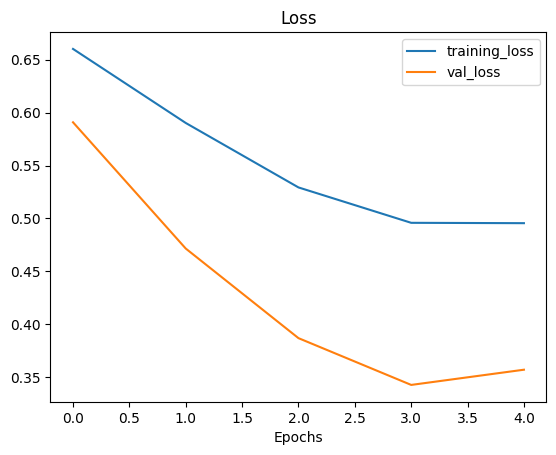

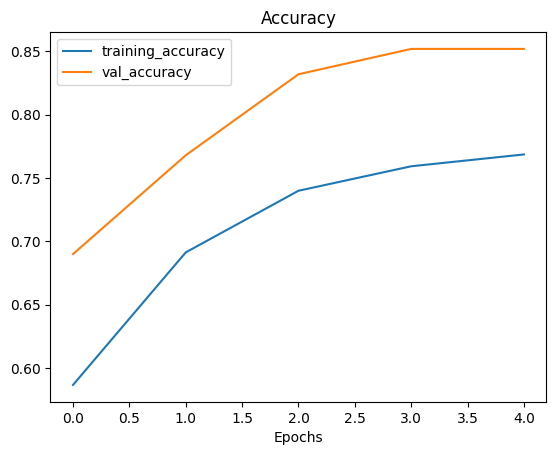

In [21]:
plot_loss_curves(history_2)

In [22]:
class_names

array(['pizza', 'steak'], dtype='<U5')

--2023-07-06 11:35:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-07-06 11:35:15 (48.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



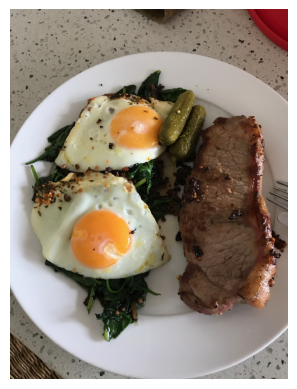

In [23]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [24]:
steak.shape

(4032, 3024, 3)

In [26]:
def load_prep_img(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,img_shape,color_channel).
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [27]:
steak = load_prep_img('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [28]:
model_2.predict(steak)

ValueError: ignored

In [29]:
steak = tf.expand_dims(steak, axis = 0) #adding an extra dimension
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [30]:
pred = model_2.predict(steak)
pred

1/1 [==============================] - 0s 246ms/step


array([[0.91198236]], dtype=float32)

In [33]:
#Binary classification gives prediction probability, anything > 0.5 will suggest that the deep learning model predicts steak to be class 1

pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [34]:
def pred_plot(model, filename, class_names):
  """
  Import an image located in filename, makes a prediction on a trained model and plots image with predicted class by model
  """
  img = load_prep_img(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 29ms/step


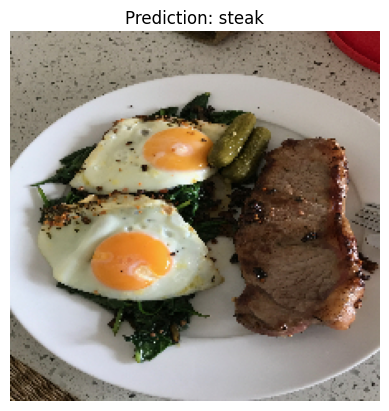

In [35]:
pred_plot(model_2, '03-steak.jpeg', class_names)

Trying another provided photo.

--2023-07-06 11:43:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-07-06 11:43:27 (59.1 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 [==============================] - 0s 38ms/step


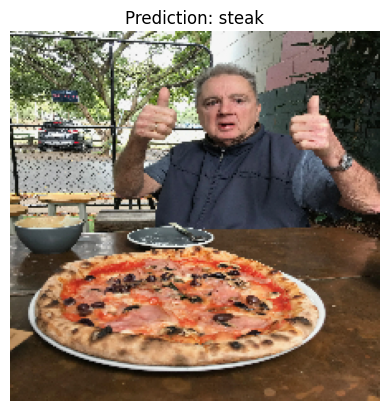

In [38]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_plot(model_2, "03-pizza-dad.jpeg", class_names)

Oops, it's not right.

Multiclass classification

In [39]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-07-06 11:45:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   100MB/s    in 6.2s    

2023-07-06 11:45:31 (79.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [41]:
import os

for dir_path, dir_names, file_names in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 10 directories and 0 imag

In [46]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [47]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (384, 512, 3)


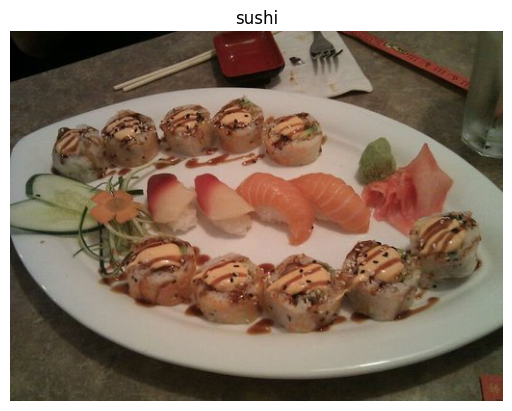

In [48]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [49]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size = 32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [50]:
model_1 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 231ms/step - loss: 2.1728 - accuracy: 0.1952 - val_loss: 2.0777 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 60s 255ms/step - loss: 1.9608 - accuracy: 0.3000 - val_loss: 1.9487 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 53s 226ms/step - loss: 1.8263 - accuracy: 0.3576 - val_loss: 1.8563 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 1.6754 - accuracy: 0.4223 - val_loss: 1.8617 - val_accuracy: 0.3532
Epoch 5/5
235/235 [==============================] - 52s 219ms/step - loss: 1.4553 - accuracy: 0.4983 - val_loss: 1.9730 - val_accuracy: 0.3368


In [51]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                          rotation_range = 20,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [52]:
model_2 = tf.keras.models.clone_model(model_1)
model_2.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 127s 528ms/step - loss: 2.2008 - accuracy: 0.1765 - val_loss: 2.0909 - val_accuracy: 0.2320
Epoch 2/5
235/235 [==============================] - 122s 518ms/step - loss: 2.1288 - accuracy: 0.2207 - val_loss: 2.0704 - val_accuracy: 0.2580
Epoch 3/5
235/235 [==============================] - 129s 549ms/step - loss: 2.0885 - accuracy: 0.2467 - val_loss: 1.9971 - val_accuracy: 0.2872
Epoch 4/5
235/235 [==============================] - 121s 516ms/step - loss: 2.0343 - accuracy: 0.2732 - val_loss: 1.8837 - val_accuracy: 0.3460
Epoch 5/5
235/235 [==============================] - 130s 553ms/step - loss: 1.9827 - accuracy: 0.3091 - val_loss: 1.8993 - val_accuracy: 0.3180


In [53]:
model_2.save('saved_trained_model')

In [54]:
loaded_model_1 = tf.keras.models.load_model('saved_trained_model')
loaded_model_1.evaluate(test_data)

79/79 [==============================] - 13s 156ms/step - loss: 1.8993 - accuracy: 0.3180


[1.8992791175842285, 0.3179999887943268]